<a href="https://colab.research.google.com/github/a3hok/Data-Visualization-spring-2022/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ashok Dahal**
#Exam 1
CPSMA 4313

To complete this assignment, I  need to get authenticated with google cloud to access the public data set.

In [38]:
#Authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')



Authenticated


Also, I am going to load all the libraries that are required.

In [40]:
#loading libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate

Now, I am authenticated and I have loaded all my required libraries.

#Gather the table on 8000km mountains from the wikipedia page https://en.wikipedia.org/wiki/List 
  
  
(a) Store the data as a pandas dataframe

In [41]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation') # getting the raw data directely from wikipedia.
contents = r.text
html_soup = BeautifulSoup(contents,"lxml") # beautiful soup to parse the code
#html_soup

Displaying the TITLE PAGE.

In [42]:
html_soup.title

<title>List of mountains by elevation - Wikipedia</title>




Showing all the List of mountains by elevation which are 8000km.

In [43]:

tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


#(b) Return only mountains in the ‘Himalayas’

I am using query method within the pandas dataframe to show the result of only mountains in the Himalayas.

In [44]:

df.query('Range == "Himalayas"')


,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


#(c) Create a barchart of the Ranges

I am using matplotlib.pyplot function to show the barchart and I am also  using group by function.

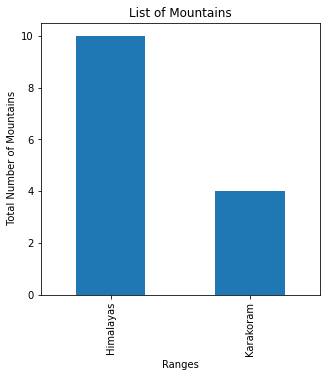

In [22]:
dfg = df.groupby(['Range'])['Range'].count()

dfg.plot(kind='bar', title='List of Mountains', ylabel=' Total Number of Mountains',
         xlabel='Ranges', figsize=(5, 5))

#(d) Create a box-plot of the height in Feet


Again, I am using matplotib.pyplot which helps me to create a box-plot.



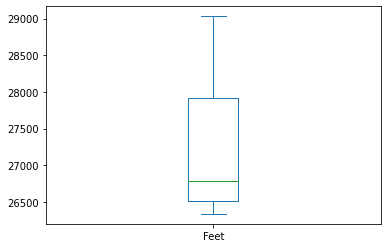

In [24]:
df.Feet.plot(kind = 'box')

#(e) Report the mean, standard deviation and five number summary of the height in Feet

I am using describe() method to compute and view mean, standard deviation and five number summary of the height.

In [26]:
df.Feet.describe()


count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

#(f) Report the mean and median of mountains when grouped by their Range.

I am using  the functions mean() and median() and grouped by their range. I am showing the report in tabular form using tabulate.

In [45]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()

print(tabulate(mean, headers=["Range", "Meter mean", "Feet mean"], tablefmt="psql"))
print(tabulate(median, headers=["Range", "Meter median", "Feet median"], tablefmt="psql"))

+-----------+--------------+-------------+
| Range     |   Meter mean |   Feet mean |
|-----------+--------------+-------------|
| Himalayas |      8319.8  |     27295.9 |
| Karakoram |      8194.25 |     26884   |
+-----------+--------------+-------------+
+-----------+----------------+---------------+
| Range     |   Meter median |   Feet median |
|-----------+----------------+---------------|
| Himalayas |         8177.5 |       26829.5 |
| Karakoram |         8065.5 |       26461.5 |
+-----------+----------------+---------------+


#2.Use BigQuery public dataset ‘chicago taxi trips.taxi

#(a) How many rows are in the dataset?


I am using COUNT to get the total number of rows in the Chicago taxi trips.taxi trips data set.

In [32]:
%%bigquery --project data-visualization-339004
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


#(b) What is the average trip total based on payment type?

Showing the average trip total based on payment type.

In [33]:
%%bigquery --project data-visualization-339004
SELECT payment_type as payment_type, AVG(trip_total) as avg_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trips
0,Cash,12.265548
1,No Charge,15.836177
2,Dispute,15.496588
3,Pcard,10.116931
4,Credit Card,20.524892
5,Prcard,20.320682
6,Prepaid,22.377662
7,Unknown,17.649893
8,Mobile,20.339910
9,Way2ride,16.639366


#c) How many trips, that had a non-zero recorded time, were above the average time?

Showing the non-zero trips above average the time.

In [37]:
%%bigquery --project data-visualization-339004
SELECT COUNT(*) as Non_Zero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,Non_Zero_trips_above_avg_time
0,62143014


3. (10 points) Questions about the exam 

#(a) Approximately how long did you work on this exam? 
= I think within 3 hours I have completed this assignment.

#(b) Which was the hardest and easiest topic from this section? 
= The **easiest** topic I find is to store the data as a pandas dataframe and searching the raw data from wikipedia. The **hardest** topic I find is to Use BigQuery public dataset which was to find non-zero recorded time, were above the average time.
#(c) Which method of gathering data are you most excited to use again?
= I find searching the data from web is very exiciting to use it again

#Resources:
nurfnick’s github repo

https://github.com/nurfnick/Data_Viz

https://github.com/nurfnick/Data_Viz/blob/main/08_html.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/02_Pandas.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/03_SQL.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/04_SQL_Essentials.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb

“I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.”